# Use Lasso to do feature selection first and then do polynomial regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('./dataset/winequality-red.csv')

y = df['quality']
X = df.drop(['quality'], axis=1)


print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)

## 1.使用交叉驗證（cross-validation）來尋找 Lasso 模型最佳的 α 值
lasso_cv = LassoCV(cv=5).fit(X, y)  
print("Best alpha: {}".format(lasso_cv.alpha_))

## 2.建立 Lasso 模型
model = linear_model.Lasso(alpha=0.005)

# Train the model using the training sets
model.fit(X, y)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))

## 3.顯示出有多少個係數不為 0
print('number of model coef: {}\n'.format(np.sum(model.coef_ != 0)))

X shape: (1599, 11)
y shape: (1599,)
Best alpha: 0.004739273801659686
Coefficients: [ 0.00220615 -0.18688589 -0.01013675  0.00622225 -0.08520514  0.03501625
 -0.09777584 -0.         -0.06740595  0.14399944  0.30646402]

number of model coef: 10



In [2]:
print('before feature extraction\nX shape: {}'.format(X.shape))
print(X.head())

before feature extraction
X shape: (1599, 11)
         0         1         2         3         4         5         6   \
0 -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.466193 -0.379133   
1 -0.298547  1.967442 -1.391472  0.043416  0.223875  0.872638  0.624363   
2 -0.298547  1.297065 -1.186070 -0.169427  0.096353 -0.083669  0.229047   
3  1.654856 -1.384443  1.484154 -0.453218 -0.264960  0.107592  0.411500   
4 -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.466193 -0.379133   

         7         8         9         10  
0  0.558274  1.288643 -0.579207 -0.960246  
1  0.028261 -0.719933  0.128950 -0.584777  
2  0.134264 -0.331177 -0.048089 -0.584777  
3  0.664277 -0.979104 -0.461180 -0.584777  
4  0.558274  1.288643 -0.579207 -0.960246  


In [3]:
mask = model.coef_ != 0
print(mask)

## 4.使用mask將係數為0對應的特徵剔除
X = X.iloc[:, mask]

print('after feature extraction\nX shape: {}'.format(X.shape))
print(X.head())

[ True  True  True  True  True  True  True False  True  True  True]
after feature extraction
X shape: (1599, 10)
         0         1         2         3         4         5         6   \
0 -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.466193 -0.379133   
1 -0.298547  1.967442 -1.391472  0.043416  0.223875  0.872638  0.624363   
2 -0.298547  1.297065 -1.186070 -0.169427  0.096353 -0.083669  0.229047   
3  1.654856 -1.384443  1.484154 -0.453218 -0.264960  0.107592  0.411500   
4 -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.466193 -0.379133   

         8         9         10  
0  1.288643 -0.579207 -0.960246  
1 -0.719933  0.128950 -0.584777  
2 -0.331177 -0.048089 -0.584777  
3 -0.979104 -0.461180 -0.584777  
4  1.288643 -0.579207 -0.960246  


In [4]:
## 5.將抽取過後的特徵做 PolynomialFeatures 提升維度(假設 degree=2)
poly = PolynomialFeatures(degree=2).fit(X)
X_poly = poly.transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_poly, y, test_size=0.2, random_state=1) #random_state 種子值


scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)


model = linear_model.LinearRegression()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(y_test, y_pred)))

Coefficients: [ 3.59207701e-18  4.60048985e-02 -1.74827652e-01 -8.72654137e-02
  2.21129785e-02 -1.30717561e-01  1.26428271e-01 -1.83404275e-01
 -9.22952869e-02  2.15627025e-01  3.32815836e-01 -7.46198464e-02
 -4.64656642e-02 -2.44119723e-02  6.20922557e-02 -4.99410460e-02
 -6.05664570e-03 -6.67171943e-02  4.11932917e-02  4.45051481e-02
 -1.22444221e-01 -2.61491647e-02  4.99189078e-02 -3.03214793e-02
  4.01649975e-02 -1.90520088e-02  1.19274760e-01 -3.27773013e-03
 -2.10764783e-02  5.40294780e-02  3.10012489e-02  9.43952368e-04
  3.28578603e-02  6.48502121e-02 -1.91914699e-03 -1.07713895e-01
 -5.31647735e-02  1.21349448e-01 -2.76014293e-02  3.85376440e-02
  4.76023005e-02  6.59644740e-04  9.50651626e-03 -5.03556201e-02
 -3.83363517e-02  6.39718671e-02 -4.42619937e-02 -3.72248329e-02
  8.25855011e-03  6.74060647e-02 -1.35644963e-02 -4.63751998e-02
 -2.68158389e-02  2.31886363e-02 -7.49549810e-02  5.04750631e-02
  4.71748850e-02 -2.64552927e-02  4.07872830e-02 -5.77564701e-02
 -2.8988899

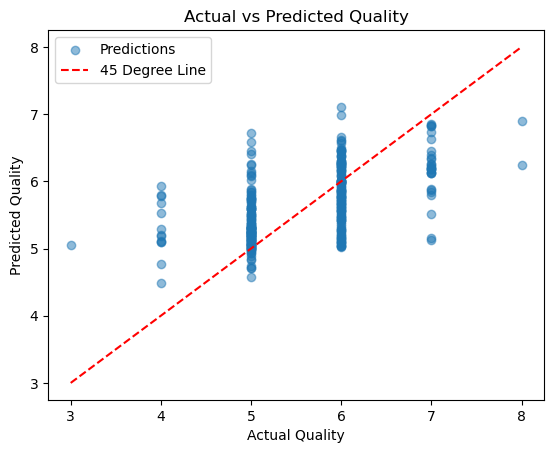

In [5]:
## 6.繪製實際值 vs 預測值散點圖
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='--', label="45 Degree Line")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality")
plt.legend()
plt.show()